In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
weight_class = [100, 115, 155, 186, 200]
weight_color = ['C0', 'C2', 'C8', 'C1']

In [51]:
start_lbs = 183
Ndays = 90
start_date = pd.to_datetime('2020/07/22')
end_date = start_date + pd.Timedelta(Ndays, unit='d')
dates = pd.date_range(start_date, end_date, freq='10d')
x = np.arange(0, Ndays + 1)

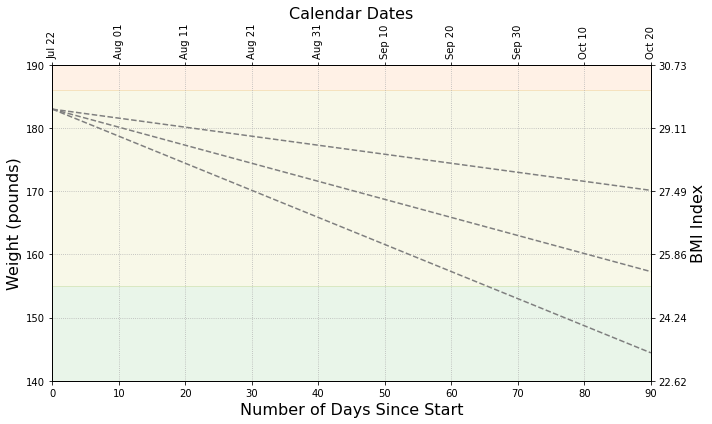

In [71]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ay2 = ax1.twinx()

# Graph weight versus number of days since start
for i in range(4):
    ax1.axhspan(weight_class[i], weight_class[i+1],
                xmax=Ndays, alpha=0.1,
                color=weight_color[i])

for i in range(1, 4):
    y = start_lbs - (i/7) * x
    ax1.plot(x, y, 'C7--')

ax1.set_xlabel('Number of Days Since Start', size=16)
ax1.set_ylabel('Weight (pounds)', size=16)
ax1.set_xlim(0, 90)
ax1.set_ylim(140, 190)
ax1.grid(ls=':')

# Turn # of days since start to calendar dates
ax2.set_xlim(ax1.get_xlim())
md = dates.strftime('%b %d')
ax2.set_xticklabels(md, rotation=90)
ax2.set_xlabel('Calendar Dates', size=16)

# Turn weight pounds into BMI index number
ay2.set_ylim(ax1.get_ylim())
df = pd.read_excel('data.xlsx', sheet_name='BMI')
coe = np.polyfit(df.weight, df.bmi, 1)
fx = np.poly1d(coe)
y2 = np.arange(140, 200, 10)
yticks = [round(j, 2) for j in fx(y2)]
ay2.set_yticklabels(yticks)
ay2.set_ylabel('BMI Index', size=16)

# Save figure
plt.tight_layout()
plt.savefig('weight-loss.png', dpi=300)